In [1]:
import os
import pickle
from music21 import converter, instrument, note, chord
import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
midi_files = os.listdir('midi_files')

##### Example to inspect before acting on all files

In [3]:
example = converter.parse(f'midi_files/{midi_files[0]}')
instruments = instrument.partitionByInstrument(example)

##### See all the instruments available in the song

In [4]:
for part in instruments.parts:
    print(part)

<music21.stream.Part Pipe Organ>
<music21.stream.Part Electric Organ>
<music21.stream.Part Harpsichord>
<music21.stream.Part StringInstrument>


##### Get the name of the instrument

In [5]:
instruments.parts[0].getInstrument().instrumentName

'Pipe Organ'

##### Go through each midi file, parse it, and extract data we want to inspect about it

In [6]:
# midi_file_data = []

# for file in midi_files:
#     parsed = converter.parse(f'midi_files/{file}')
#     data = {
#         'file_name': file,
#         'seconds_length': parsed.parts[0].seconds,
#     }
    
#     instruments = instrument.partitionByInstrument(parsed)
#     if instruments:
#         data['instruments'] = [part.getInstrument().instrumentName for part in instruments.parts]
#         data['avg_notes'] = mean([len(part.notes) for part in instruments.parts])
        
#     midi_file_data.append(data)
    
# df = pd.DataFrame(midi_file_data)
# with open('pickles/midi_df.pickle', 'wb') as f:
#     pickle.dump(df, f)

with open('pickles/midi_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [7]:
df.head()

,file_name,seconds_length,instruments,avg_notes
0,FridayThe13th_-_MapDark.mid,93.272727,"[Pipe Organ, Electric Organ, Harpsichord, Stri...",468.000000
1,cv1-4.mid,41.533333,"[Electric Organ, Bass, Piano, Violoncello]",149.250000
2,MM3-Snake_Man.mid,124.125874,"[BASS (FINGER), Electric Bass, SYNTH BASS, Sam...",606.250000
3,dw4batl.mid,115.231788,"[Electric Guitar, Bass, Electric Bass, Bass Su...",340.400000
4,Balloon_Fight_-_Main_Theme_%28Dancing_Balloon%...,11559.700000,"[Steel Drum, Bass, Sampler, Synth bass, None, ...",414.571429


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       4204 non-null   object 
 1   seconds_length  4131 non-null   float64
 2   instruments     4201 non-null   object 
 3   avg_notes       4201 non-null   float64
dtypes: float64(2), object(2)
memory usage: 131.5+ KB


##### Update types in the dataframe

In [9]:
df['file_name'] = df['file_name'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       4204 non-null   string 
 1   seconds_length  4131 non-null   float64
 2   instruments     4201 non-null   object 
 3   avg_notes       4201 non-null   float64
dtypes: float64(2), object(1), string(1)
memory usage: 131.5+ KB


##### Pull out one giant list of all instruments for inspection

In [10]:
all_instruments = [
    instrument for instrument_list in df['instruments'] 
    if isinstance(instrument_list, list) 
    for instrument in instrument_list
]

In [11]:
instruments_df = pd.DataFrame(all_instruments, columns=['instrument'])
instruments_df['instrument'].fillna('Unknown', inplace=True)
instruments_df.value_counts().head(25)

instrument      
Sampler             2253
Piano               2112
Electric Bass       1836
StringInstrument    1272
Unknown             1211
Electric Guitar      936
Acoustic Bass        649
Acoustic Guitar      617
Bass                 527
Electric Organ       484
Brass                480
Fretless Bass        381
Trumpet              309
Clarinet             270
Harp                 263
Flute                249
Voice                235
Celesta              212
Contrabass           212
Violin               188
Timpani              167
Horn                 163
Clavichord           156
Vibraphone           153
Harpsichord          152
dtype: int64

<AxesSubplot:xlabel='instrument'>

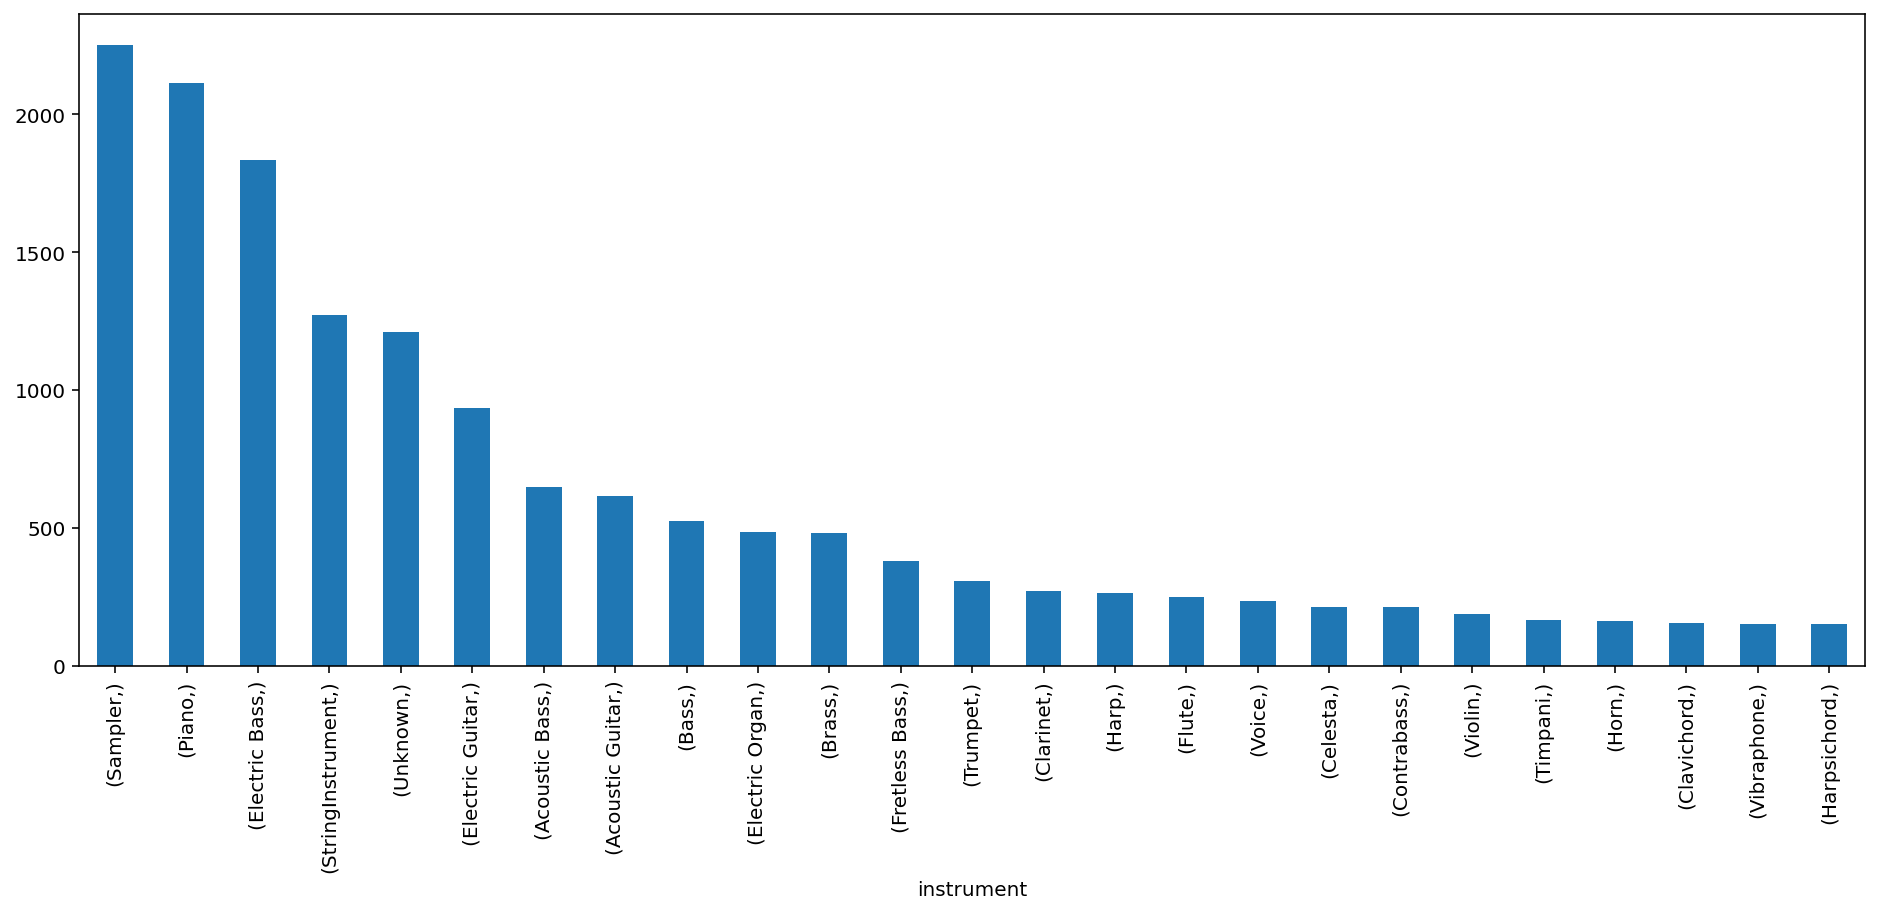

In [12]:
plt.figure(figsize=(16,6))
instruments_df.value_counts().head(25).plot(kind='bar')

##### Inspect the lengths of each song

In [13]:
df['seconds_length'].describe()

count     4131.000000
mean        91.348056
std        251.779098
min          0.000000
25%         41.920680
50%         74.805195
75%        111.225141
max      11559.700000
Name: seconds_length, dtype: float64

In [14]:
df.sort_values(by='seconds_length', ascending=False)

,file_name,seconds_length,instruments,avg_notes
4,Balloon_Fight_-_Main_Theme_%28Dancing_Balloon%...,11559.700000,"[Steel Drum, Bass, Sampler, Synth bass, None, ...",414.571429
4019,ff1fightgs1.mid,8980.916667,[Sampler],790.000000
266,vampire_killer%281%29.mid,5387.619048,"[Sampler, StringInstrument, Timpani, Techno Ba...",199.625000
2313,Super_Mario_Bros_-_Castle_%28Techno_Gabber_rem...,2057.583333,"[Sampler, Bass, None]",803.000000
2493,JILost_-_NES_-_Wizards_and_Warriors_III_-_Fina...,870.838397,"[StringInstrument, Piano, Electric Bass]",9984.000000
...,...,...,...,...
4008,StarTropics-peter.mid,NaN,"[Sampler, Clarinet, Flute, Acoustic Bass, None]",191.800000
4022,dq4cave.mid,NaN,"[Sampler, Voice]",412.000000
4091,StarTropics-chapter_3_intro.mid,NaN,"[Sampler, Violin, Viola, Electric Organ, Elect...",42.166667
4112,Stage1.mid,NaN,"[Electric Guitar, Electric Bass, None]",160.000000


##### Guess at a good range of lengths to pull out so we don't end up with music too short or too long

In [15]:
usable_songs = df[df['seconds_length'].between(10, 200)]
usable_songs

,file_name,seconds_length,instruments,avg_notes
0,FridayThe13th_-_MapDark.mid,93.272727,"[Pipe Organ, Electric Organ, Harpsichord, Stri...",468.000000
1,cv1-4.mid,41.533333,"[Electric Organ, Bass, Piano, Violoncello]",149.250000
2,MM3-Snake_Man.mid,124.125874,"[BASS (FINGER), Electric Bass, SYNTH BASS, Sam...",606.250000
3,dw4batl.mid,115.231788,"[Electric Guitar, Bass, Electric Bass, Bass Su...",340.400000
5,mm1wily2.mid,49.014085,"[Electric Guitar, Acoustic Bass]",215.500000
...,...,...,...,...
4197,B2_Stage_6.mid,100.043478,"[Sampler, E.Piano 2, Piano]",1367.333333
4198,MM2_Metal_Man-KM.mid,92.061100,"[Slap Bass 1, Electric Bass, Picked Bass, Elec...",393.777778
4199,To_the_Earth_Anthem.mid,25.714286,"[None, TBS Montego II MIDI, Sampler, Brass, Pi...",64.400000
4200,GuerillaWar-lev2%28Wingroove%29v.1.00.mid,130.258065,"[Bass, Electric Bass, Trumpet, Trumpet Echo, T...",640.500000


In [16]:
grouped_lengths = usable_songs['seconds_length'].groupby(pd.cut(usable_songs['seconds_length'], bins=10))
grouped_lengths.count()

seconds_length
(9.81, 28.997]        395
(28.997, 47.993]      478
(47.993, 66.99]       632
(66.99, 85.987]       586
(85.987, 104.983]     558
(104.983, 123.98]     369
(123.98, 142.977]     264
(142.977, 161.973]    159
(161.973, 180.97]      98
(180.97, 199.967]      81
Name: seconds_length, dtype: int64

<AxesSubplot:xlabel='seconds_length'>

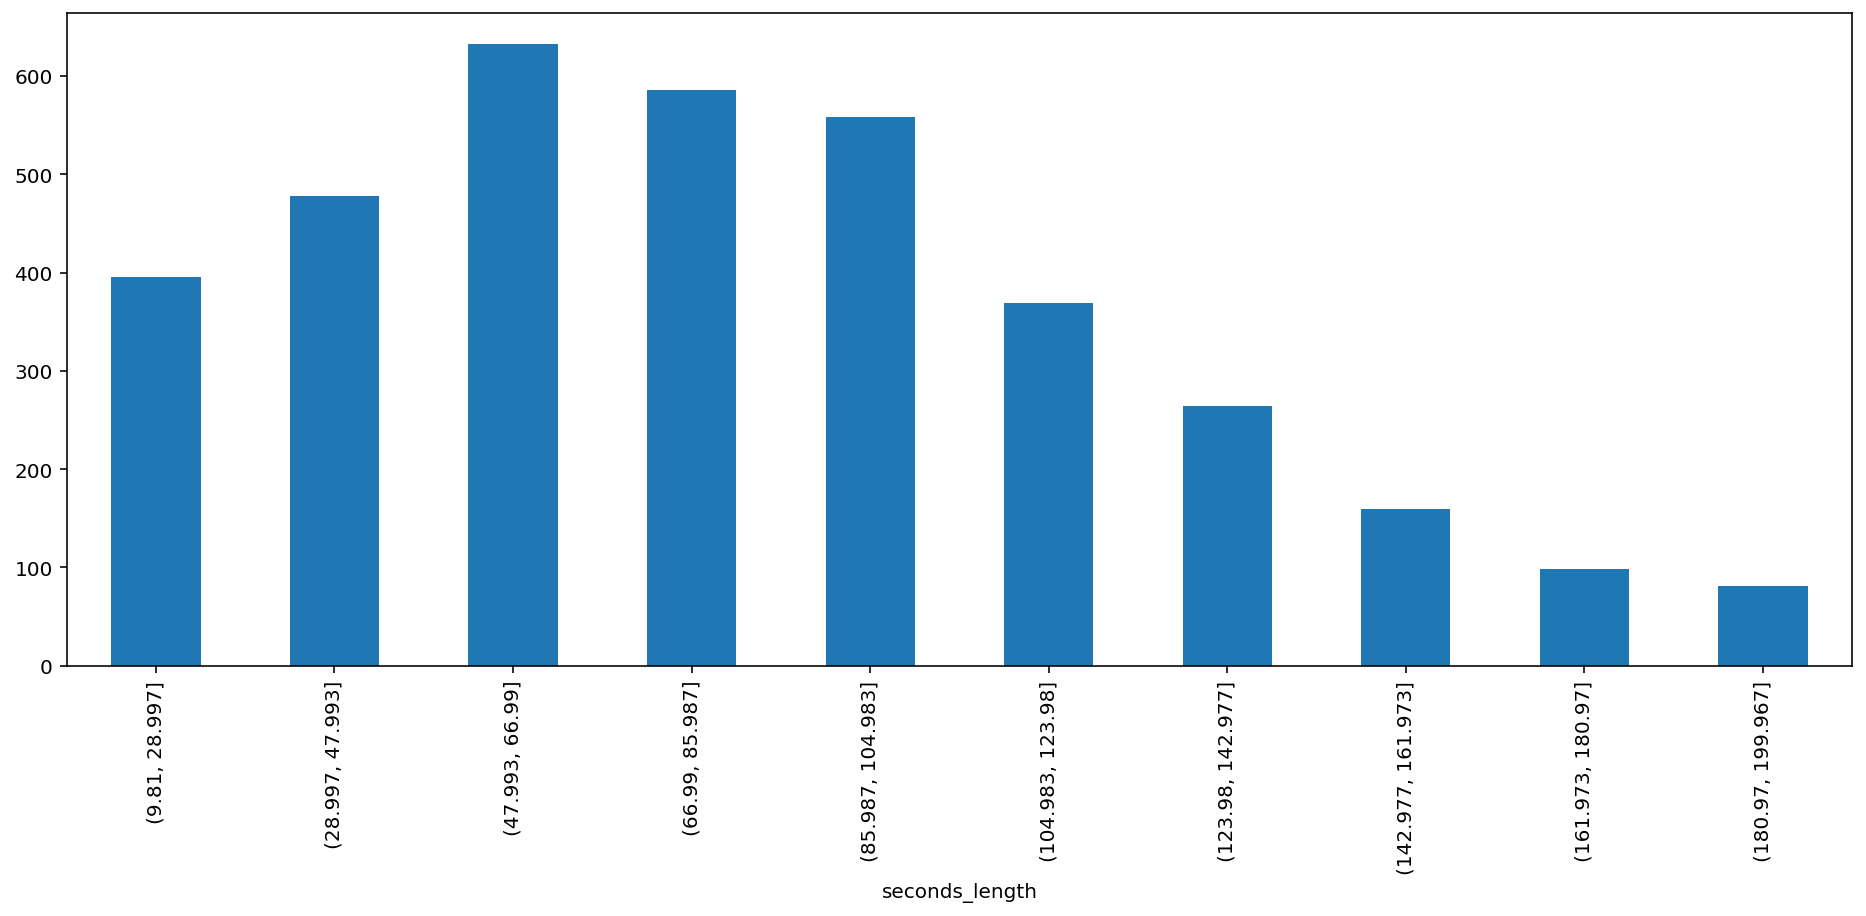

In [17]:
plt.figure(figsize=(16,6))
grouped_lengths.count().plot(kind='bar')

##### It appears as if the seconds length is sometimes wrong, so lets also take a look at the average number of notes per song

In [18]:
without_note_outliers = df[df['avg_notes'] < 1000]

In [19]:
grouped_notes = without_note_outliers['avg_notes'].groupby(pd.cut(without_note_outliers['avg_notes'], bins=10))
grouped_notes.count()

avg_notes
(-0.363, 100.523]     731
(100.523, 200.409]    842
(200.409, 300.295]    697
(300.295, 400.182]    519
(400.182, 500.068]    407
(500.068, 599.955]    269
(599.955, 699.841]    184
(699.841, 799.727]    136
(799.727, 899.614]     96
(899.614, 999.5]       75
Name: avg_notes, dtype: int64

<AxesSubplot:xlabel='avg_notes'>

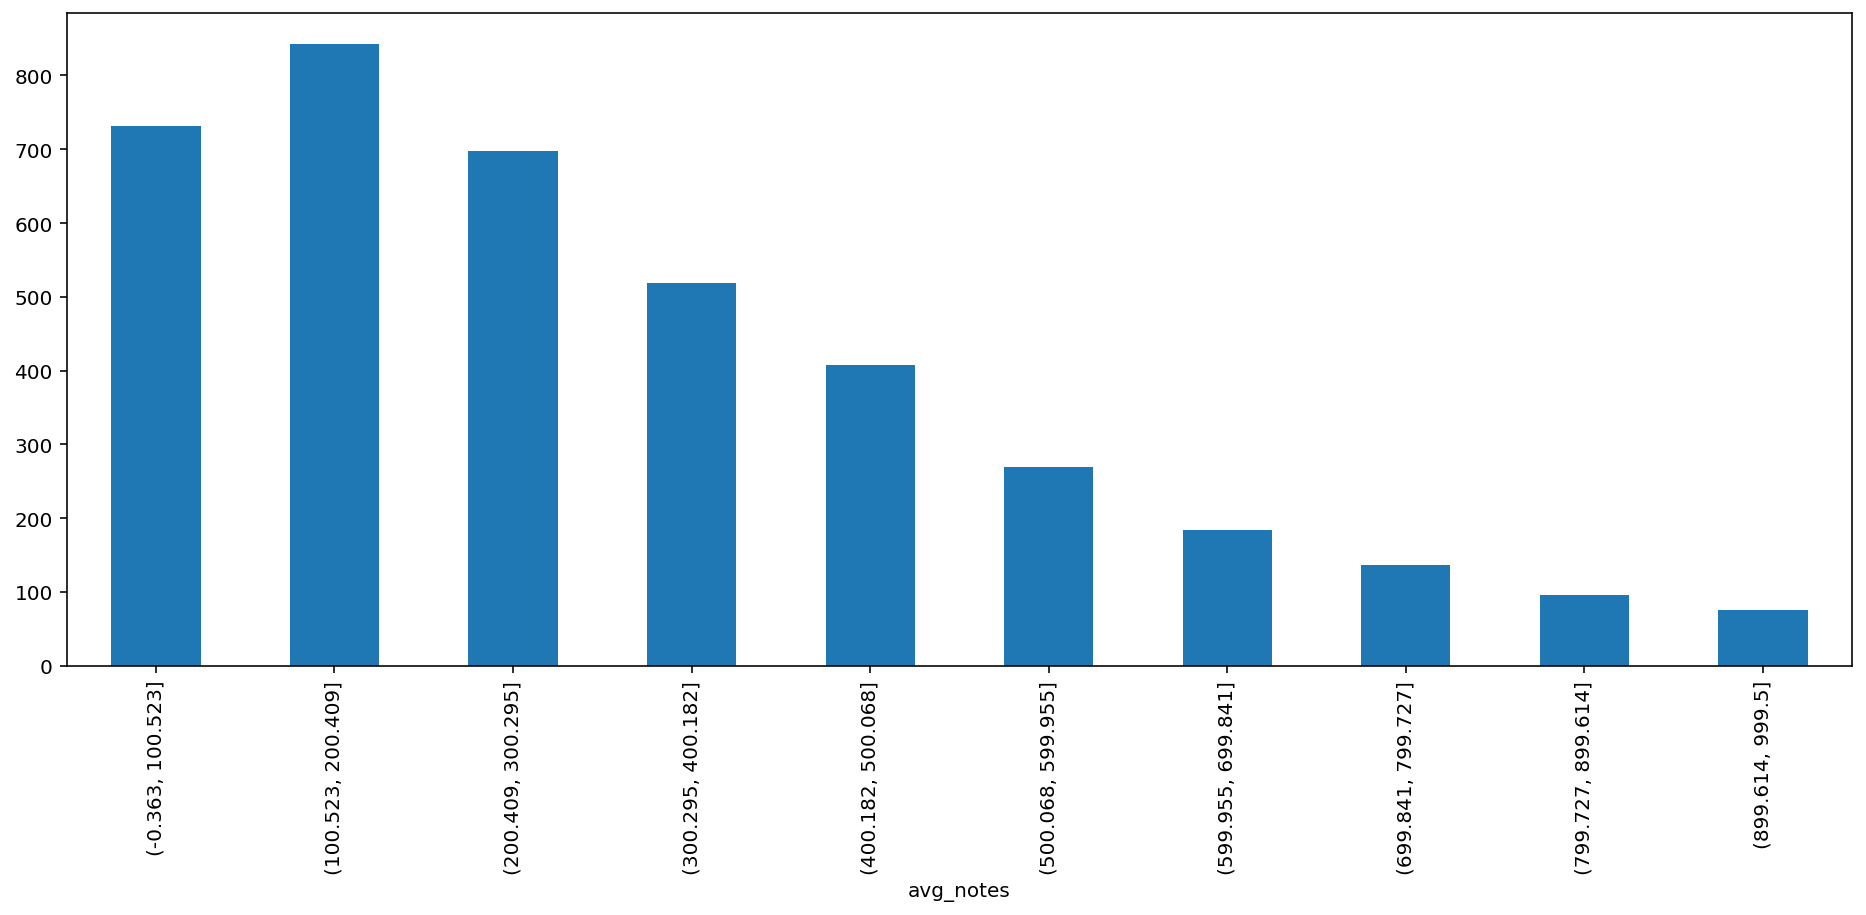

In [20]:
plt.figure(figsize=(16,6))
grouped_notes.count().plot(kind='bar')

<AxesSubplot:xlabel='seconds_length', ylabel='avg_notes'>

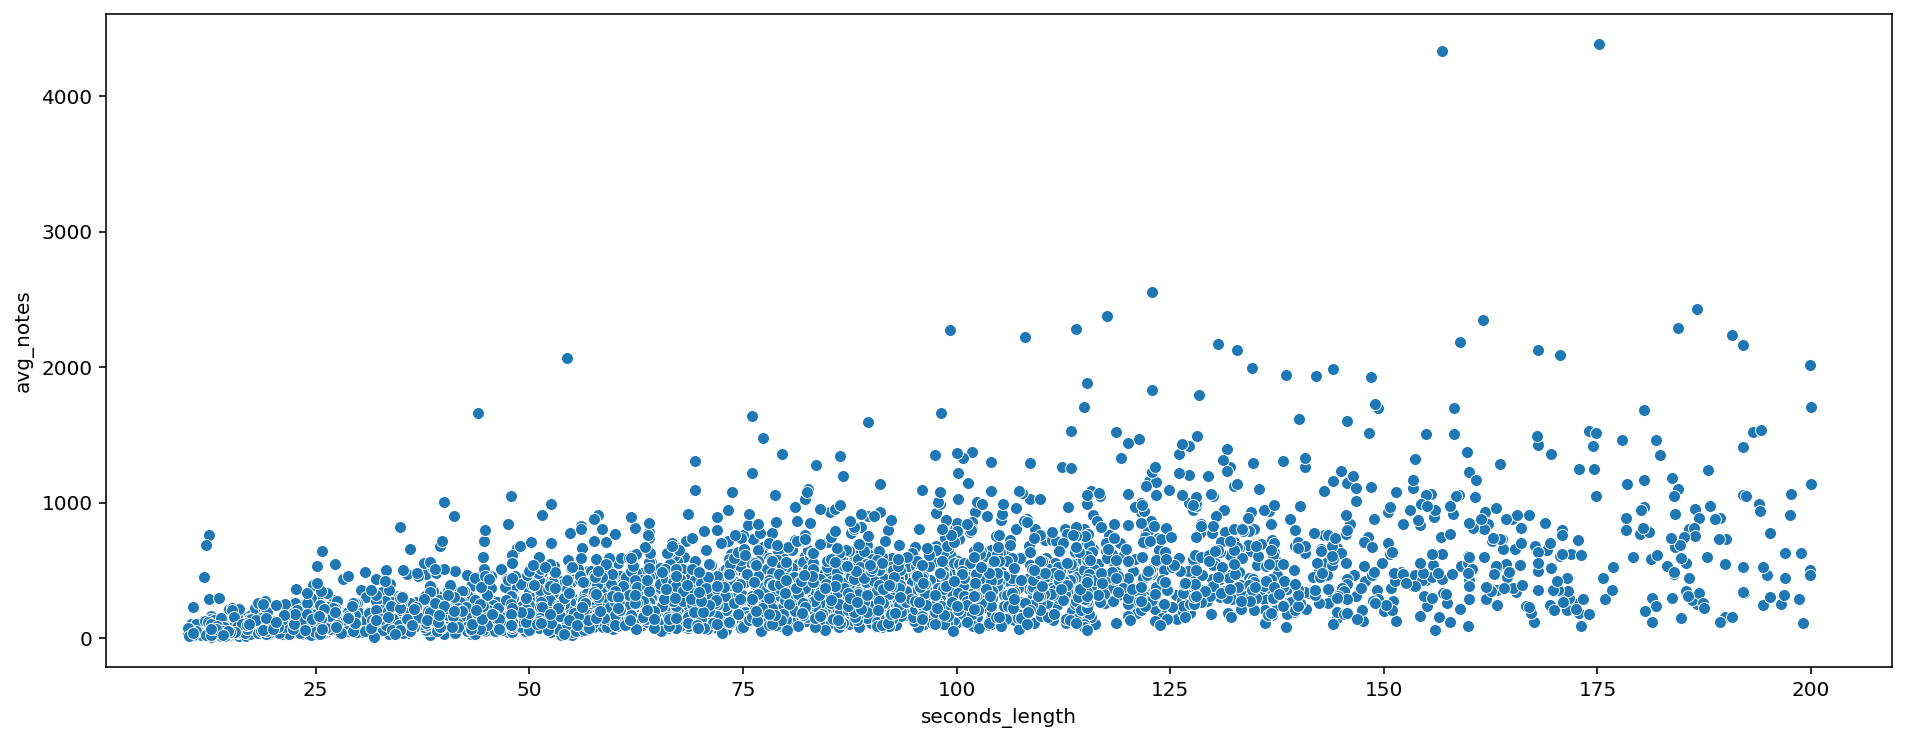

In [21]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=usable_songs, x='seconds_length', y='avg_notes')

<AxesSubplot:xlabel='seconds_length', ylabel='avg_notes'>

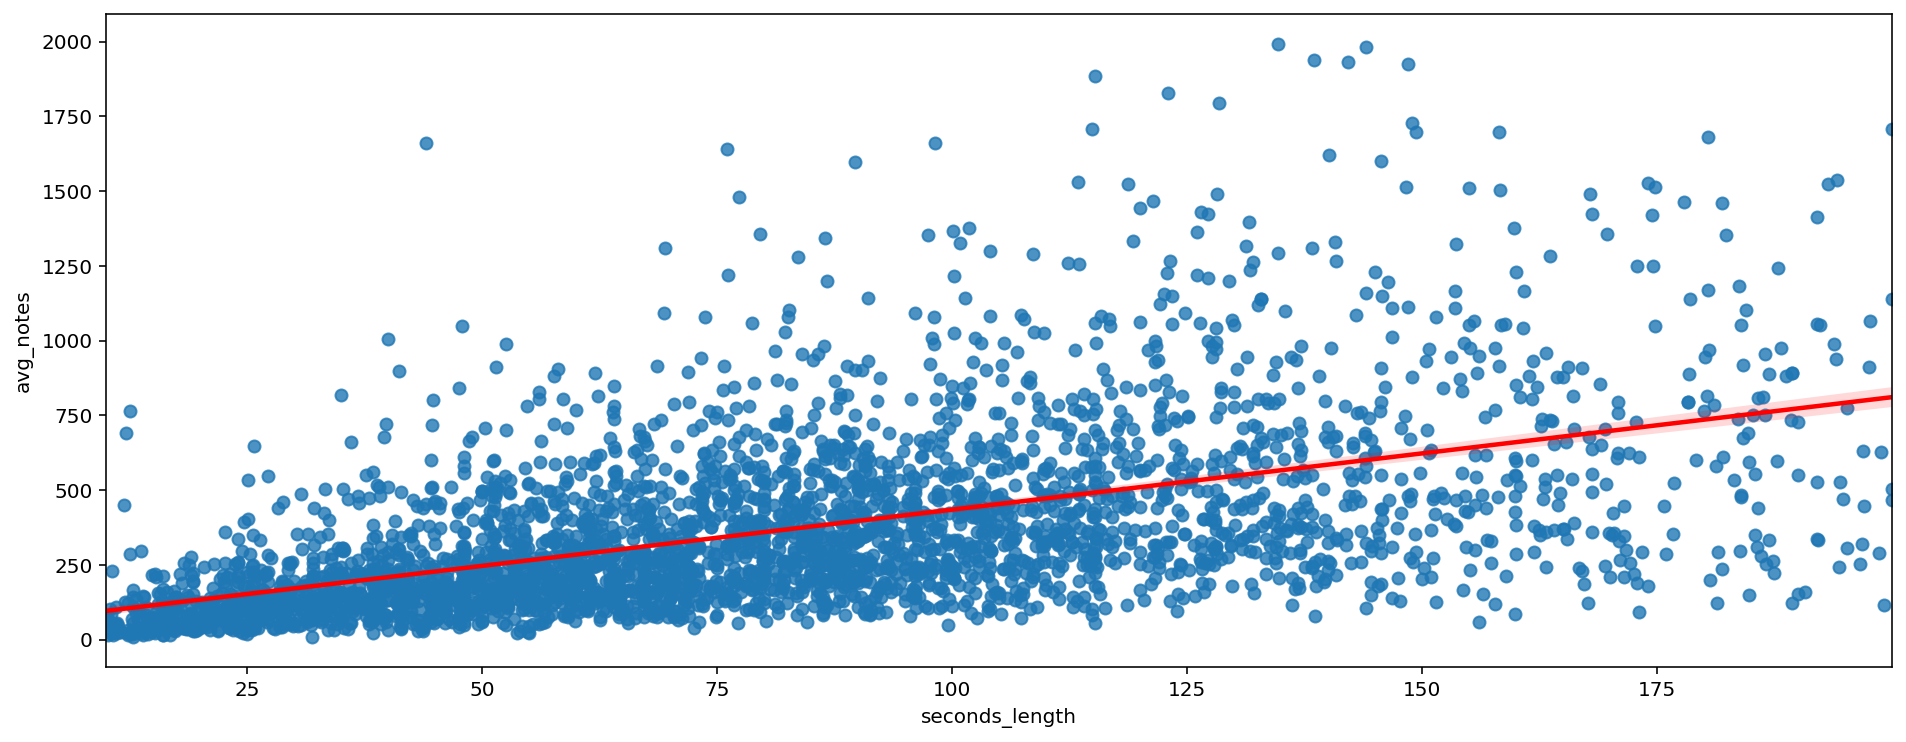

In [22]:
usable_songs_without_note_outliers = usable_songs[usable_songs['avg_notes'] < 2000]
plt.figure(figsize=(16,6))
sns.regplot(data=usable_songs_without_note_outliers, x='seconds_length', y='avg_notes', line_kws={'color': 'red'})

In [23]:
reg = LinearRegression()

x = usable_songs_without_note_outliers['seconds_length'].values.reshape(-1, 1)
y = usable_songs_without_note_outliers['avg_notes']

reg.fit(x, y)
reg.score(x, y)

0.29842652800505165

<AxesSubplot:xlabel='seconds_length', ylabel='avg_notes'>

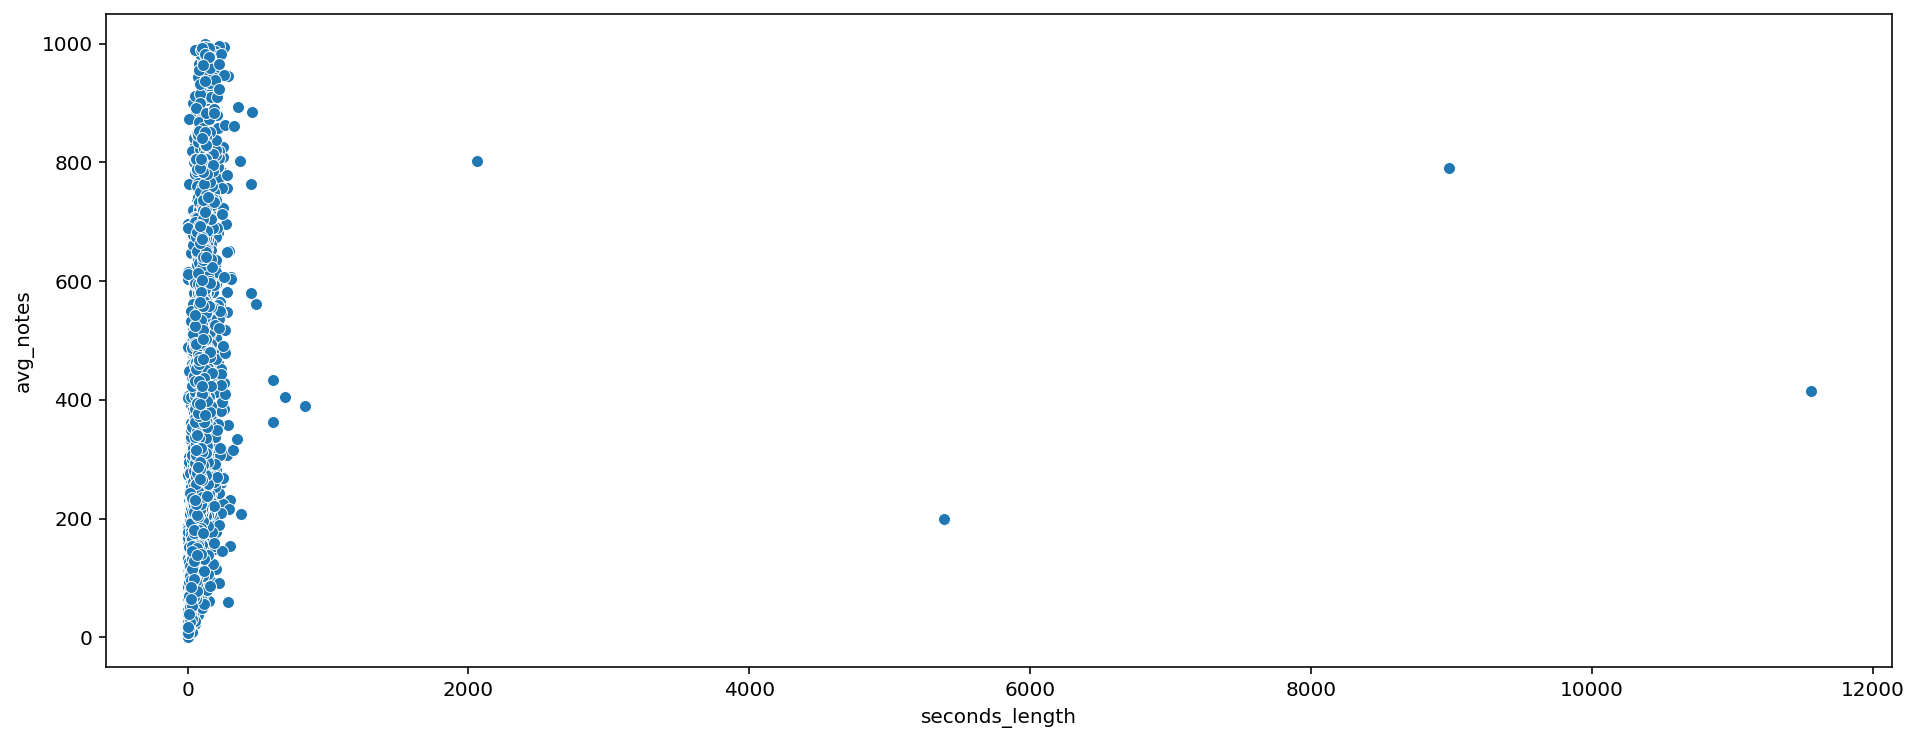

In [24]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=without_note_outliers, x='seconds_length', y='avg_notes')

<AxesSubplot:xlabel='seconds_length', ylabel='avg_notes'>

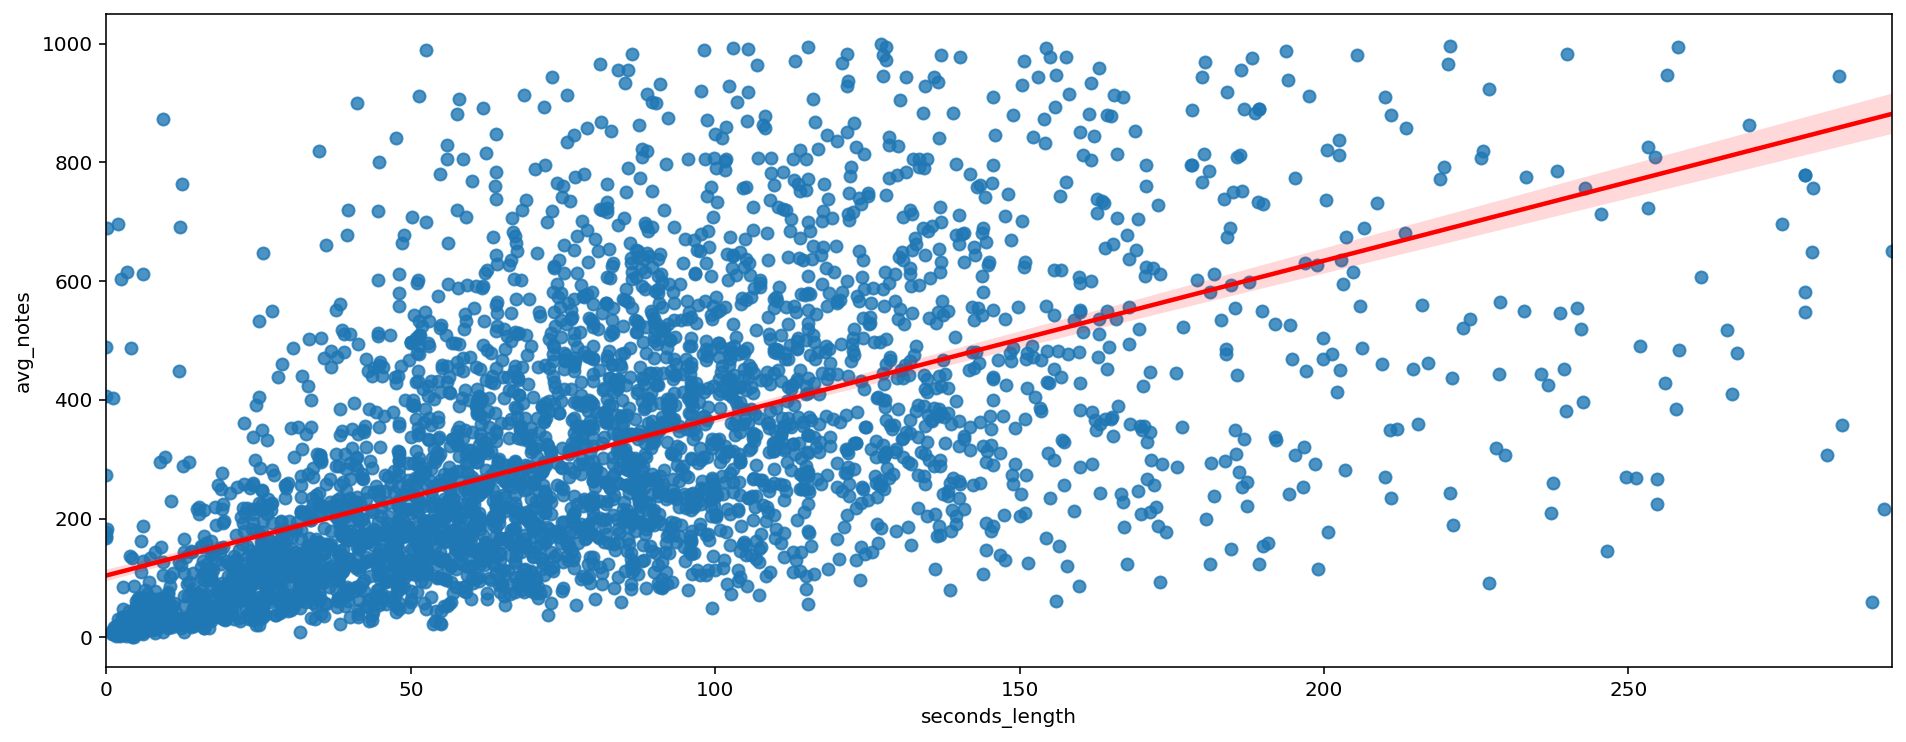

In [25]:
without_note_and_seconds_outliers = without_note_outliers[without_note_outliers['seconds_length'] < 300]
plt.figure(figsize=(16,6))
sns.regplot(data=without_note_and_seconds_outliers, x='seconds_length', y='avg_notes', line_kws={'color': 'red'})

In [26]:
x = without_note_and_seconds_outliers['seconds_length'].values.reshape(-1, 1)
y = without_note_and_seconds_outliers['avg_notes']

reg.fit(x, y)
reg.score(x, y)

0.34980640872991686

It appears as if seconds_length (which can be wildly inaccurate for unknown reasons from music21), and avg_notes (which can be wildly different based on how quickly some instruments are playing) end up with a loosely positive correlation, which may help us pick songs that are not outliers in either notes or length to make the training data better